# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
#Url for  and buld query url
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="
#List
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []
#for loop
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")


City processed: hobart
City processed: heinola
City processed: pervomayskoye
City NOT found: belushya guba
City processed: carlsbad
City processed: swan river
City processed: kapaa
City processed: torbay
City processed: east london
City processed: muzhi
City processed: hermanus
City processed: atuona
City processed: albany
City processed: mar del plata
City processed: daru
City processed: cape town
City processed: busselton
City processed: yeppoon
City processed: seryshevo
City processed: sioux lookout
City processed: rawson
City processed: kupang
City processed: nikolskoye
City processed: carnarvon
City processed: leeuwarden
City processed: port elizabeth
City processed: baoro
City processed: dikson
City processed: ushuaia
City processed: ancud
City processed: svetlogorsk
City processed: xai-xai
City processed: rikitea
City processed: punta arenas
City processed: samarai
City processed: pevek
City processed: assiniboia
City processed: evensk
City NOT found: warqla
City processed: yell

City processed: palmas de monte alto
City processed: kisaran
City processed: jitra
City processed: mnogovershinnyy
City NOT found: sentyabrskiy
City processed: palmer
City NOT found: vaitupu
City processed: banda aceh
City processed: bengkulu
City processed: port hardy
City processed: chulucanas
City processed: mvuma
City processed: bulgan
City processed: martapura
City NOT found: tunduru
City processed: harper
City NOT found: saleaula
City processed: butaritari
City processed: pochutla
City processed: marapanim
City NOT found: mahadday weyne
City processed: krasnozerskoye
City processed: kerema
City processed: vardo
City processed: nizwa
City processed: new amsterdam
City processed: giyani
City processed: marsaxlokk
City processed: claresholm
City processed: cukai
City processed: ust-kulom
City processed: vasilyevskiy mokh
City processed: urucara
City processed: amga
City processed: valdosta
City processed: ndele
City processed: general pico
City processed: yongan
City processed: taut

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
#Turn to a dataframe
Wthr_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

# count and drop NA
Wthr_DF = Wthr_DF.dropna(how="any")
print(Wthr_DF.count())

City           567
Country        567
Temperature    567
Humidity       567
Cloudiness     567
Windspeed      567
Latitude       567
Longitude      567
Date           567
dtype: int64


In [42]:

#export  to csv
Wthr_DF.to_csv("cities.csv", index=False)
#Display 
Wthr_DF = pd.read_csv("../output_data/cities.csv")

Wthr_DF.head(-10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
533,533,hakkari,0,FI,1558378896,46,61.34,23.75,69.80,5.82
534,534,marzuq,84,YE,1558378896,36,14.40,46.47,79.44,6.02
535,535,villaviciosa,20,ES,1558378896,71,43.48,-5.43,59.00,6.93
536,536,padang,100,ID,1558378896,82,-0.92,100.36,81.24,7.65


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
# check for humididty over 100
badHumidityDF = Wthr_DF[(Wthr_DF['Humidity'] > 100)]
badHumidityDF

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
129,129,paita,0,PE,1558378778,290,-5.09,-81.11,62.6,17.22


In [44]:
#  Get the indices of cities that have humidity over 100%.
badHumidityDF.index

Int64Index([129], dtype='int64')

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Wthr_DF.join(badHumidityDF, how='outer')
clean_city_data = Wthr_DF.merge(badHumidityDF,on=index,inplace=False).query('index=City_ID')

ValueError: columns overlap but no suffix specified: Index(['City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat',
       'Lng', 'Max Temp', 'Wind Speed'],
      dtype='object')

In [ ]:
# get neeeded field from the data
City_Data = Wthr_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]
#expoert clean data 
City_Data.to_csv("citie_clean_data.csv", index=False)
City_Data.head()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
#create scatter plot for lat vs , max temp
endRunDate = Wthr_DF["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = Wthr_DF["Latitude"]
y = Wthr_DF["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

## Latitude vs. Humidity Plot

In [ ]:
# Create a scatter plot for latitude vs humidity.
x_values = Wthr_DF['Lat']
y_values = Wthr_DF['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 2)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
# Create a scatter plot for latitude vs cloudiness.
x_values = Wthr_DF['Lat']
y_values = Wthr_DF['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 2)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
# Create a scatter plot for latitude vs wind speed.
x_values = Wthr_DF['Lat']
y_values = Wthr_DF['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 2)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [ ]:
#create linear reg plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
Northern_DF = Wthr_DF.loc[Wthr_DF["Lat"] > 0]
Southern_DF = Wthr_DF.loc[Wthr_DF["Lat"] < 0]

The r-squared is: 0.6644951847801387
The correlation between both factors is -0.82


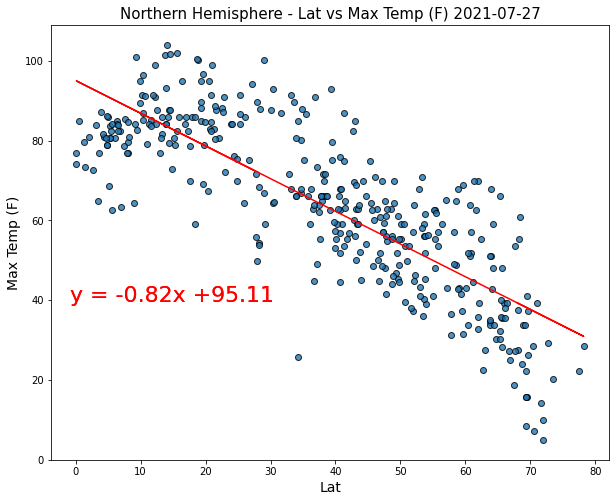

In [48]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = Northern_DF['Lat']
y_values = Northern_DF['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/NNorthern_DF.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.047879684291709905
The correlation between both factors is 0.22


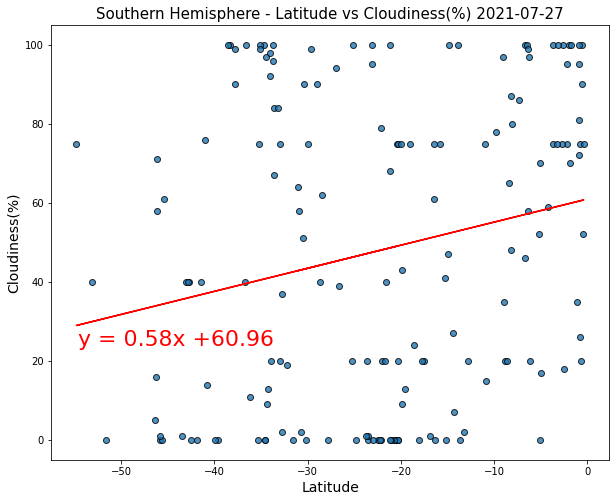

In [49]:

# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = Southern_DF['Lat']
y_values = Southern_DF['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

In [50]:
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/southern_hem_max_lin_lat_DF.png", bbox_inches="tight")
plt.show()

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010729512501511098
The correlation between both factors is 0.1


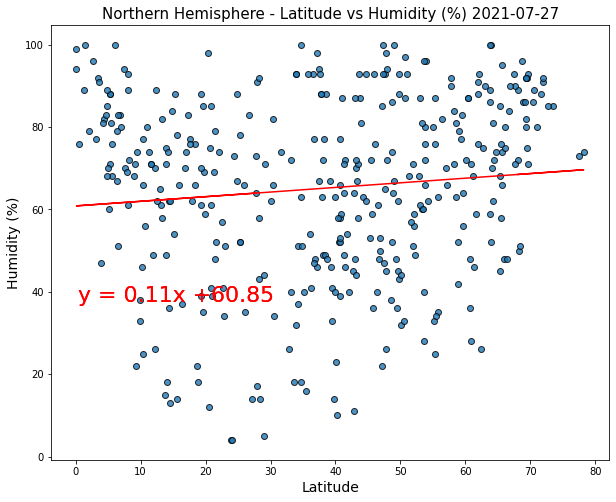

In [51]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = Northern_DF['Lat']
y_values = Northern_DF['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/humiduty_vsnorth.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010729512501511098
The correlation between both factors is 0.1


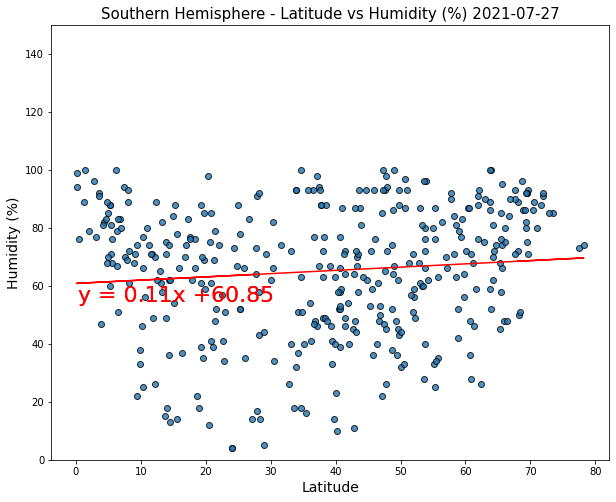

In [53]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = Southern_DF['Lat']
y_values1 = Southern_DF['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(30, 10), 150)
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/humiduty_vsnorth.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007627485925231676
The correlation between both factors is -0.09


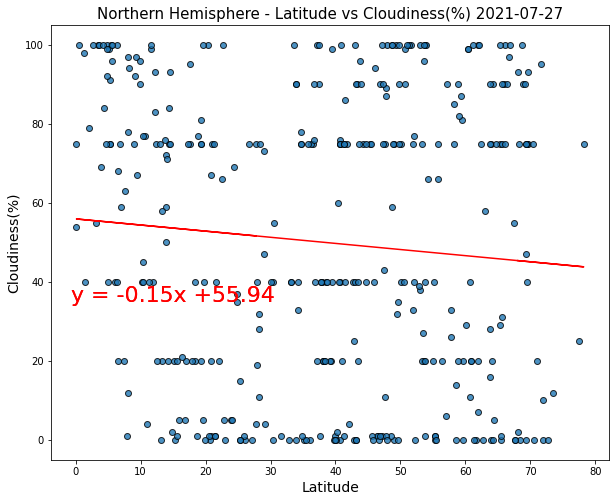

In [54]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = Northern_DF['Lat']
y_values = Northern_DF['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/humiduty_vsnorth.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.047879684291709905
The correlation between both factors is 0.22


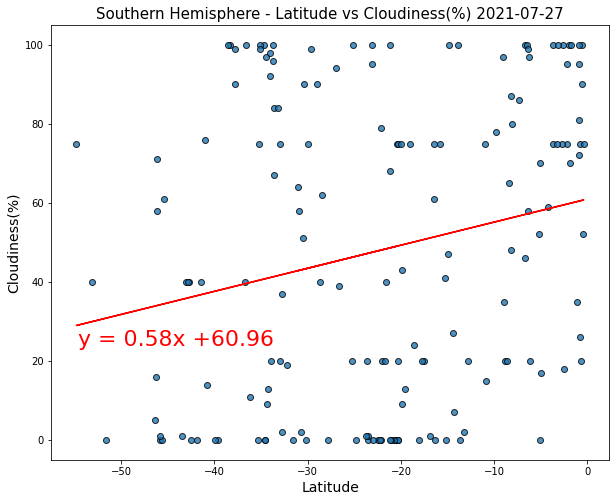

In [55]:
x_values = Southern_DF['Lat']
y_values = Southern_DF['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 50))
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/humiduty_vsnorth.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011478610492563573
The correlation between both factors is 0.11


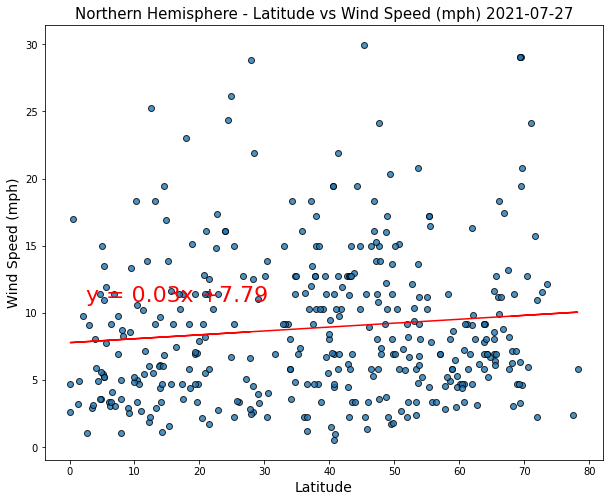

In [57]:
x_values = Northern_DF['Lat']
y_values = Northern_DF['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(15, 25))
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/humiduty_vsnorth.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10399533504138532
The correlation between both factors is -0.32


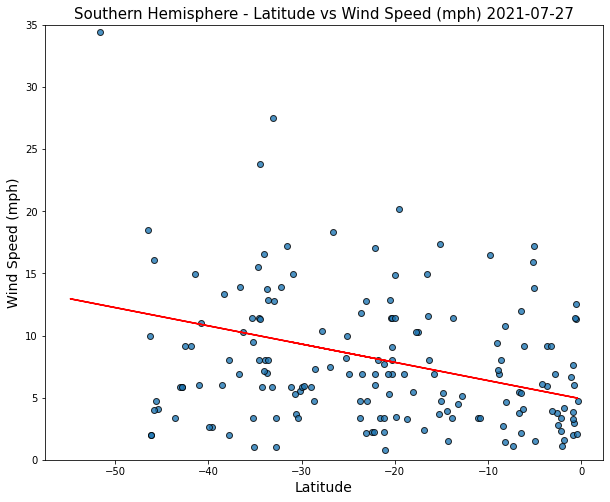

In [61]:
x_values = Southern_DF['Lat']
y_values = Southern_DF['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=35)


In [62]:
plt.savefig("C:/Users/school/Desktop/api_hw/python-api-challenge/output_data/humiduty_vsnorth.png", bbox_inches="tight")
plt.show()

<Figure size 432x288 with 0 Axes>